In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from scipy.stats import laplace, norm
from scipy.optimize import curve_fit
from scipy.stats import norm, laplace

from scipy.stats import anderson_ksamp, ks_2samp, shapiro
from scipy.optimize import curve_fit
%matplotlib inline

Total data used 200/200
EFAC 1.45
sig_level 0.5452713464323318


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


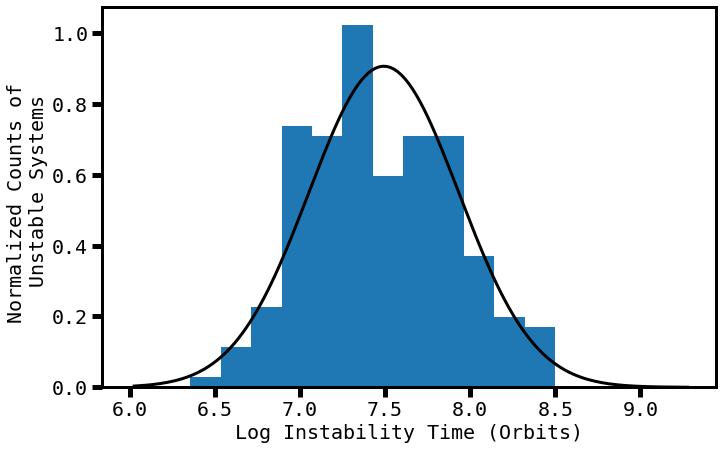

In [21]:
def plot_dists(efac, bins = [None], stat_tests=False, plot_gaussian = False):
    #efac = 1.45
    data = pd.read_csv("../../csvs/Solar_feats/solar_{0}_1e9_200.csv".format(efac), index_col=0)
    times = data["t"].values
    total = times.shape[0]
    #print(total)
    times = np.log10(times//2./np.pi)
    is_valid = np.where(np.isnan(times) ==False)[0]
    #print(is_valid.shape)
    valid_times = times[is_valid]
    final = is_valid.shape[0]
    
    fig, ax1 = plt.subplots(figsize=(11, 7))
    
    print("Total data used {0}/{1}".format(final, total))
    if bins[0] == None:
        ax1.hist(valid_times, normed = 1)
    else:
        ax1.hist(valid_times, normed = 1, bins = bins)
    #plt.axvline(np.log10(5000000000))
    
    #fig.title("Solar System with Increased Eccentricities by a Factor of {0}".format(efac) )
    print("EFAC", efac)
    mu_fit, sig_fit =  norm.fit(valid_times)
    
    # mean sigma from non resonant systems
    rv = norm(loc = mu_fit, scale = 0.440)
    x= np.linspace(valid_times.min() - 0.5, valid_times.max()+0.15, 150 ) 
    if (plot_gaussian == True):
        ax1.plot(x, rv.pdf(x), linewidth = 3, color = "black")
    
    ax1.set_xlabel("Log Instability Time (Orbits)")
    ax1.set_ylabel("Normalized Counts of \n Unstable Systems")

    #determine significance of gaussain fit
    np.random.seed(0)
    test = np.random.normal(loc=mu_fit, scale=0.4504391160881758, size = valid_times.shape[0])
    #plt.figure()
    #plt.hist(test)
    #plt.hist(valid_times)
    if stat_tests:
        try:
            statistic, p_val = ks_2samp(times, test)
        except:
            statistic, p_val = 0,0
        print("sig_level", p_val)
    
#plot_dists(1.45)
bins = np.linspace(6, 8.5, 15)
plot_dists(1.45, bins = bins, stat_tests=True, plot_gaussian=True)

Total data used 193/200
EFAC 1.5
sig_level 0.8961122993887739


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


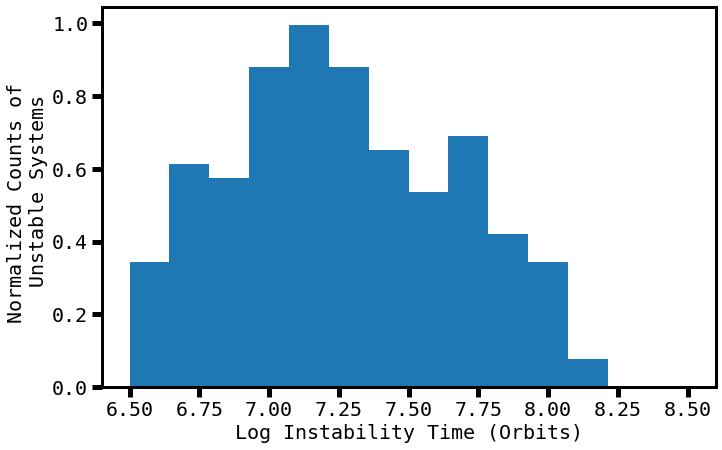

In [22]:
plt.rc('lines', linewidth=3)
plt.rc('font', size = 20, family = 'monospace')
# plt.rc('font', size=48, family='serif', weight=500)
plt.rc('mathtext', fontset = 'dejavuserif')
plt.rc('axes', linewidth=3)
plt.rc('patch', linewidth=3)
plt.rc('xtick.major', width=5, size=10)
plt.rc('xtick.minor', width=4, size=10)
plt.rc('ytick.major', width=5, size=10)
plt.rc('ytick.minor', width=4, size=10)


bins = np.linspace(6.5, 8.5, 15)
plot_dists(1.5, bins = bins, stat_tests=True)

Total data used 161/200
EFAC 1.4


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


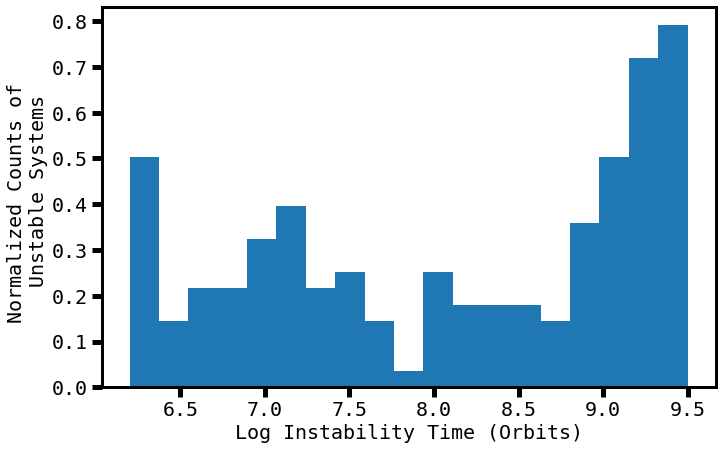

In [26]:
# here its clear that the gaussian is a very poor fit!
plot_dists(1.4, bins = np.linspace(6.2, 9.5, 20))

Total data used 146/200


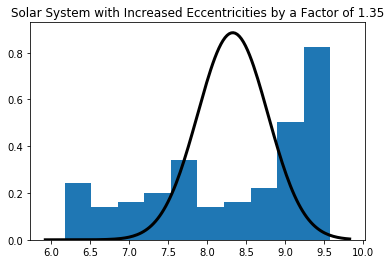

In [27]:
plot_dists(1.35)

Total data used 39/200


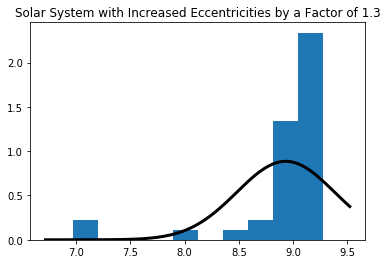

In [28]:
plot_dists(1.3)

Total data used 0/200


/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:184: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:189: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


ValueError: zero-size array to reduction operation minimum which has no identity

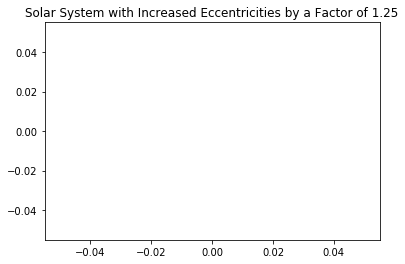

In [30]:
plot_dists(1.25)